# KNN - Caso Titanic

En este notebook, utilizaremos K-Nearest Neighbor para entrenar un algoritmo de clasificación que permita establecer un modelo que prediga los sobrevivientes del dataset Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carga de Datos y Análisis Exploratorio

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


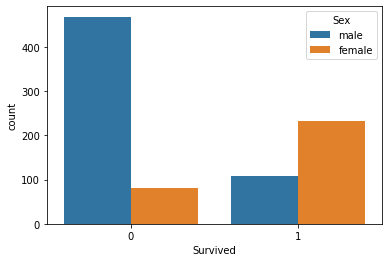

In [4]:
sns.countplot(x="Survived", hue="Sex", data=df)

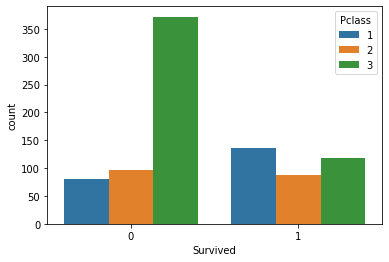

In [5]:
sns.countplot(x="Survived", hue="Pclass", data=df)

### Valores perdidos

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

La cabina no aporta mucho en el análisis, pero la edad es una variable importante para predecir si una persona sobrevivió o no a la trajedia. A continuación, una forma de "visualizar" los valores perdidos.

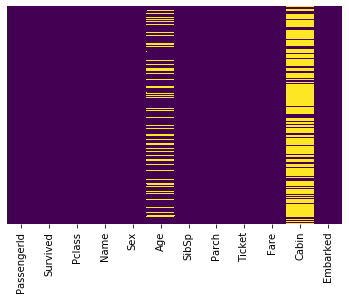

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Haremos una imputación de la edad del pasajero en función del promedio de edad de la clase en la que viajaba.

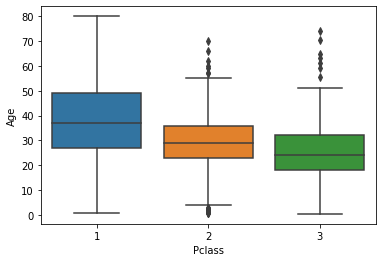

In [8]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [9]:
edades = round(df.groupby('Pclass').mean()['Age'])
edades

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [10]:
# creamos una funcion que imputa la edad en caso de estar nula
def imputar_edad(cols):
    edad = cols[0]
    pclass = cols[1]
    if(pd.isnull(edad)):
        if(pclass==1):
            return 38
        if(pclass==2):
            return 30
        if(pclass==3):
            return 25
    else:
        return edad

In [11]:
df['Age'] = df[['Age','Pclass']].apply(imputar_edad, axis=1)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Formulación del modelo

En esta sección seleccionaremos las variables que incorporaremos en la matriz de predictores "X" y en el vector de resultados "y", ya que no todas las columnas son de utilidad.

In [13]:
X = 
y = 

### Tratamiento de variables categoricas

La variable Embarked es categórica, debemos transformarla en variable dummy para incorporarla en el modelo.

In [14]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


### Escalamiento de Features

### Validación cruzada

### Entrenamiento del algoritmo K_NN

### Determinación del valor de K